In [1]:
import pandas as pd
import numpy as np
from six.moves import urllib
from scipy.io import loadmat
import numpy as np
from sklearn.linear_model  import SGDClassifier
from scipy.io import loadmat


# Fetch the data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Looking at one of the data samples

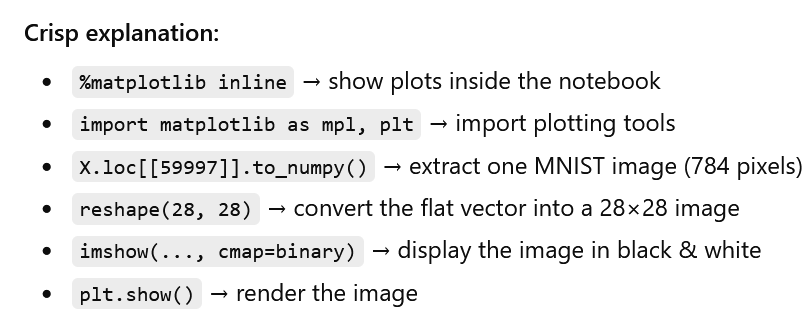

In [ ]:

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.loc[[59997]].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()

# Deviding dataset into training and test in python

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train

In [ ]:
# Lets change our training and test set labels in MNIST to train 5 detector
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5') # True for all 5s, False for all other digits

In [ ]:
y_train_5

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=0).fit(X_train, y_train_5)

In [ ]:
some_digit = X.iloc[59997] # Taking the First image
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
# Calculating accuracy using cross_val_score
import numpy as np
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
# Get the predicted values
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Confusion matrix of 5-detector
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
# Get Precision Score of 5-detector
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

In [ ]:
# Get Recall Score of 5-detector
recall_score(y_train_5, y_train_pred)

In [ ]:
# Get f1 score of 5-detector
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
some_digit = X.iloc[0].tolist() # Taking the First image
some_digit

In [ ]:
#Calculating the decision function score for the SGDClassifier
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
# For ‘5’ and ‘Not 5’ classifier
# For threshold = 0, classifier correctly classifies 5 as 5

threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
# For ‘5’ and ‘Not 5’ classifier
# For threshold = 0, classifier correctly classifies 5 as 5
# For threshold = 8000, classifier incorrectly classifies digit 5 as not 5

# Setting the threshold to 8000
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    plt.figure(figsize=(8, 4))
    

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
# So let’s say you want to build a classifier with 90% precision
# Then first select the threshold value which gives you 90% precision
# Then build classifier using this threshold

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

#                                            Multiclass Classification

In [ ]:
#Multiclass Classifier Using SGDClassifier
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
# Check Accuracy Using Cross Validation
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
# Models after Scaling Features

In [ ]:
# Multiclass Classification: Improving Accuracy by Scaling the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, scoring="accuracy")

# Multi-label Classification
● Multi-output Classification

In [ ]:
# Step 1: Get the new labels
y_train = y_train.astype(np.float64)

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # np.c_ is used to concatenate the two arrays element wise

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
# Step 3: Test it
knn_clf.predict([some_digit]) #  Digit 5 is not large (i.e. it not 7 or 8 or 9) but is odd

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train and test labels (optional, for overall frequency)
all_labels = np.concatenate((y_train, y_test))

# Count the frequency of each digit
unique, counts = np.unique(all_labels, return_counts=True)
frequency = dict(zip(unique, counts))

# Display the frequencies
print("Digit Frequencies in MNIST Dataset:")
for digit, freq in frequency.items():
    print(f"Digit {digit}: {freq} occurrences")

# Visualize frequencies as a bar chart
plt.bar(unique, counts)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Frequency of Digits in MNIST Dataset')
plt.xticks(unique)
plt.show()
